In [3]:
import numpy as np
import pandas as pd
import xgboost as xgb
from xgboost import plot_importance 
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('kmeans.csv',encoding='cp949')

In [5]:
y = df['보증금']
x = df[['층','임대면적','보증금','건축년도','경제활동인구','기준금리','전세가격비율']]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=11)

In [7]:
xgb_model = XGBClassifier(n_estimators=100)

In [8]:
params = {'max_depth':[5,7], 'min_child_weight':[1,3], 'colsample_bytree':[0.5,0.75]}

In [9]:
gridcv = GridSearchCV(xgb_model, param_grid=params, cv=3)

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [11]:
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric='auc', eval_set=[(x, y)])

In [ ]:
print(gridcv.best_params_)

{'colsample_bytree': 0.5, 'max_depth': 5, 'min_child_weight': 1}


In [ ]:
xgb_model = XGBClassifier(n_estimators=1000, learning_rate=0.02, max_depth=5, min_child_weight=1, colsample_bytree=0.5, reg_alpha=0.03)
xgb_model.fit(X_train, y_train, early_stopping_rounds=200, eval_metric='auc', eval_set=[(x, y)])

[20:08:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/metric/auc.cc:330: Dataset is empty, or contains only positive or negative samples.
[0]	validation_0-auc:nan
[20:09:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/metric/auc.cc:330: Dataset is empty, or contains only positive or negative samples.
[1]	validation_0-auc:nan
[20:09:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/metric/auc.cc:330: Dataset is empty, or contains only positive or negative samples.
[2]	validation_0-auc:nan
[20:09:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/metric/auc.cc:330: Dataset is empty, or contains only positive or negative samples.
[3]	validation_0-auc:nan
[20:09:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/metric/auc.cc:330: Dataset is empty, or contains only positive or negative samples.
[4]	validation_0-auc:nan
[20:09:18] WARNING: C:/Users/A

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.02, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0.03, ...)

In [ ]:
xgb_pred = xgb_model.predict(X_test)

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# y_train = le.fit_transform(y_train)

In [ ]:
# xgb = XGBClassifier(n_estimators=500, learning_rate=0.005, max_depth=5)
# xgb.fit(X_train,y_train)
# xgb_pred = xgb.predict(X_test)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def MAPE(y_test, y_pred):
	return np.mean(np.abs((y_test - y_pred) / y_test)) * 100 
    
print(f"MAPE: {MAPE(y_test, xgb_pred):.3f}")

MAPE: 98.283


In [ ]:
from sklearn import metrics

print("MAE : " + str(metrics.mean_absolute_error(y_test, xgb_pred)))
print("MSE : " + str(metrics.mean_squared_error(y_test, xgb_pred)))
print("RMSE : " + str(np.sqrt(metrics.mean_squared_error(y_test, xgb_pred))))
print("R^2 : " + str(metrics.r2_score(y_test,xgb_pred)))

MAE : 85205.23497027086
MSE : 9800317719.972914
RMSE : 98996.55408130585
R^2 : -2.7862988287246537


In [ ]:
from xgboost import plot_tree
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [ ]:
# plot_tree(xgb); plt.show()
# plot_tree(xgb, num_trees=4); plt.show()
# plot_tree(xgb, num_trees=0, rankdir='LR'); plt.show()

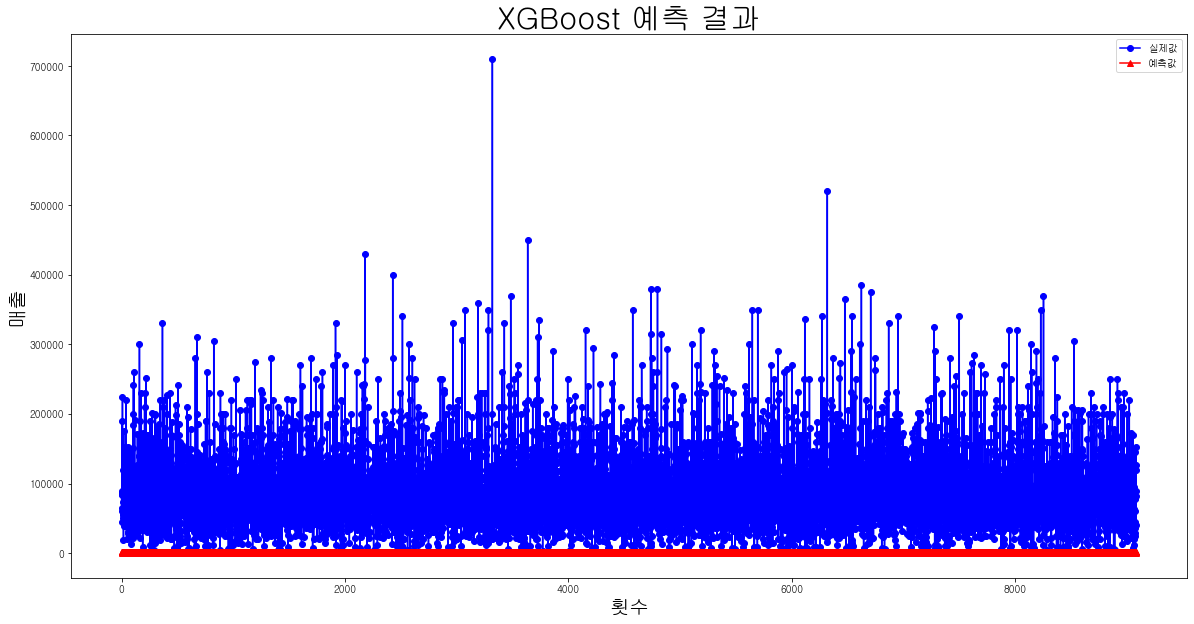

In [ ]:
fig = plt.figure( figsize = (20, 10))
chart = fig.add_subplot(1,1,1)
chart.plot(y_test.values, marker='o', color='blue', label='실제값')
chart.plot(xgb_pred, marker='^', color='red', label='예측값')
chart.set_title('XGBoost 예측 결과', size=30)
plt.xlabel('횟수', size=20)
plt.ylabel('매출', size=20)
plt.legend(loc = 'best') 